In [13]:
pdos_Zn_3d[1]

1988

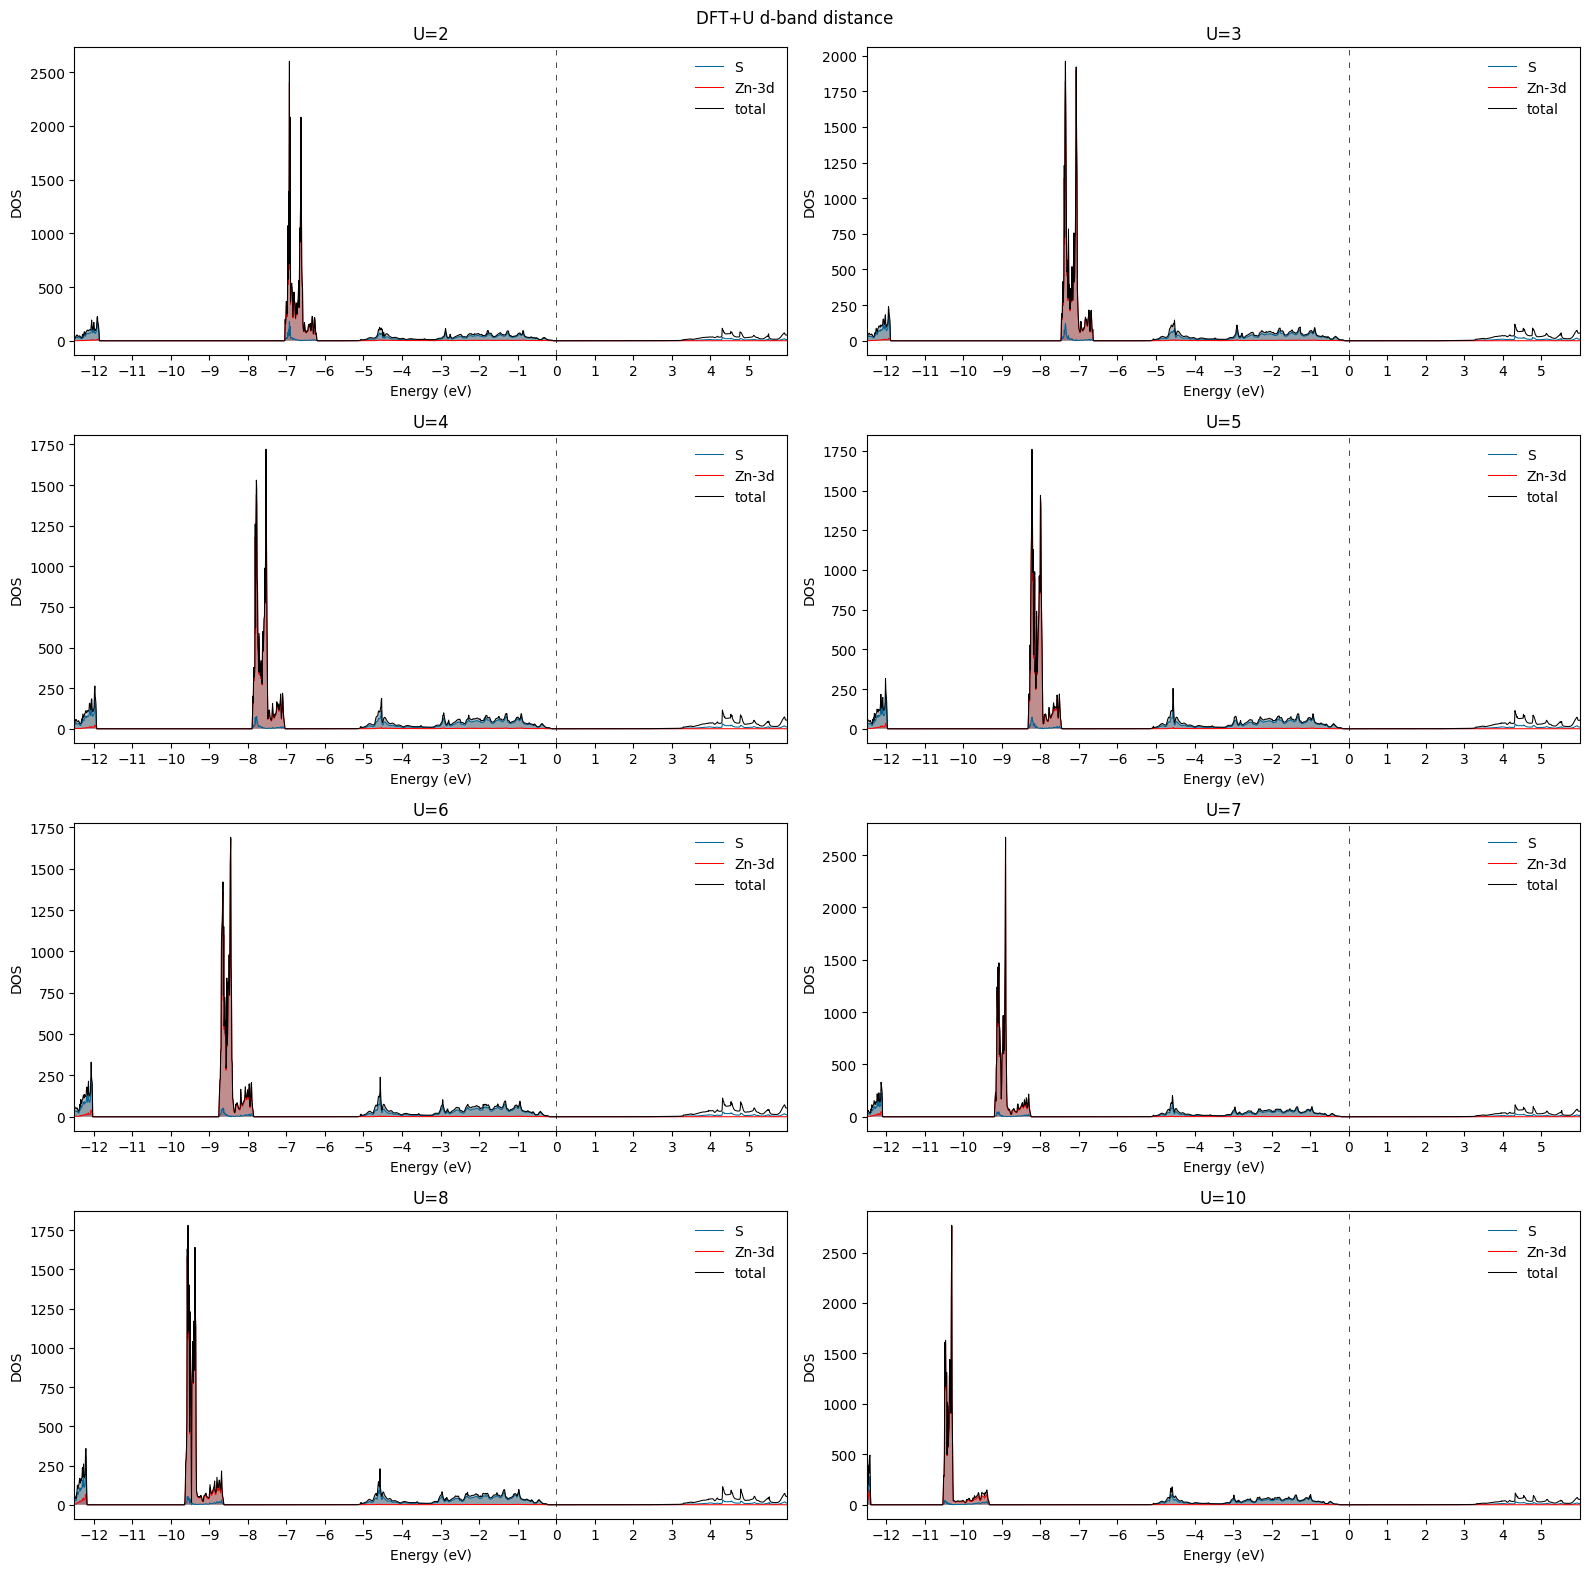

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
ws = 1
def data_loader(fname):

    data = np.loadtxt(fname, skiprows=1, dtype='float')

    energy =  data[:,0]#data[int(ws/2)-1:int(-1*ws/2),0]

    pdos = []
    arr_up = data[:,1]
    i = 0
    while i < len(arr_up)-ws + 1:
        window = arr_up[i : i + ws]
        avg = sum(window)/ws
        pdos.append(avg)
        i += 1

    return energy, pdos
c = 0

# make plots
fig = plt.figure(figsize=(16, 16))

for i in [2, 3, 4, 5, 6, 7, 8, 10]:
    c += 1
    i = str(i)
    fnameprefix = f"pristine/Ud.{i}"
    energy, pdos_Zn_3d = data_loader(f'{fnameprefix}/Zn_3d.pdos')
    _, pdos_S = data_loader(f'{fnameprefix}/S.pdos')
    _, pdos_tot = data_loader(f'{fnameprefix}/ZnS_hub.pdos_tot')
    
    fermi = 5.5452
    # create subplots
    ax = fig.add_subplot(4, 2, c)

    # plot data
    ax.plot(energy - fermi, pdos_S, linewidth=0.75, color='#006699', label='S')
    ax.plot(energy - fermi, pdos_Zn_3d, linewidth=0.75, color='r', label='Zn-3d')
    ax.plot(energy - fermi, pdos_tot, linewidth=0.75, color='k', label='total')
    ax.set_xlabel('Energy (eV)')
    ax.set_ylabel('DOS')
    ax.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    ax.fill_between(energy - fermi, 0, pdos_S, where=(energy - fermi < 0), facecolor='#006699', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_Zn_3d, where=(energy - fermi < 0), facecolor='r', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_tot, where=(energy - fermi < 0), facecolor='k', alpha=0.25)
    ax.legend(frameon=False)
    ax.set_title(f"U={i}")
    #ax.set_ylim(0,500)
    ax.set_xlim(-12.5, 6)
    ax.set_xticks(np.arange(-12,6,1))

# adjust subplot layout
plt.subplots_adjust(hspace=0.4)

# set the overall title
plt.suptitle("DFT+U d-band distance")
plt.tight_layout()
# show the plot
plt.show()

